In [1]:
import acgan
import tqdm
import twodlearn as tdl
import tensorflow as tf
import tensorflow_datasets as tfds
from functools import reduce
import matplotlib.pyplot as plt
BATCH_SIZE = 128
acgan.data.DATA_DIR = '/data/marinodl/tensorflow_datasets'
session = tf.InteractiveSession()


In [2]:
#tfds.list_builders()

In [3]:
dataset, info = acgan.data.load_celeb_a(BATCH_SIZE)
input_shape = dataset.output_shapes.as_list()

Instructions for updating:
Colocations handled automatically by placer.


W0329 18:43:26.008763 140395089311552 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [4]:
input_shape

[None, 64, 64, 3]

In [5]:
model = acgan.model.MSG_GAN(
    embedding_size=256,
    generator={'init_shape':(4, 4, 512),
               'units': [256, 128, 64, 3],
               'kernels': 3,
               'strides': 2,
               'padding': ['same', 'same', 'same', 'same']},
    discriminator={'units':[128, 256, 512, 1024],
                   'kernels':5,
                   'strides':2,
                   'dropout':None}
)
# model.noise_rate.init(rate=0.001)

In [6]:
model.generator.compute_output_shape(input_shape = [None, 100])

TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(3)])

In [7]:
iter = dataset.make_one_shot_iterator()
xreal = iter.get_next()

gen = model.generator_trainer(BATCH_SIZE, learning_rate=0.0002)
dis = model.discriminator_trainer(BATCH_SIZE, xreal=xreal, learning_rate=0.0002)

Instructions for updating:
Use tf.cast instead.


W0329 18:44:09.376322 140395089311552 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0329 18:44:09.411521 140395089311552 deprecation.py:323] From /data/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [8]:
tdl.core.variables_initializer(gen.variables).run()
tdl.core.variables_initializer(dis.variables).run()
#tf.global_variables_initializer().run()

In [9]:
print('step {} | dis {} | gen {}'.format(dis.train_step.eval(), dis.loss.eval(), gen.loss.eval()) )

step 0 | dis 0.6890937685966492 | gen 0.6930173635482788


In [ ]:
acgan.train.run_training(dis=dis, gen=gen, n_steps=100, n_logging=10)

  1%|          | 1/100 [00:02<03:43,  2.25s/it]

step 1 | dis 0.5688983201980591 | gen 0.5317612886428833


 11%|█         | 11/100 [00:09<01:12,  1.22it/s]

step 11 | dis 0.3626677393913269 | gen 0.6717838048934937


 21%|██        | 21/100 [00:28<02:21,  1.78s/it]

step 21 | dis 0.4846213459968567 | gen 0.9342344403266907


 31%|███       | 31/100 [00:50<03:18,  2.88s/it]

step 31 | dis 1.535722017288208 | gen 0.05886025354266167


 41%|████      | 41/100 [01:04<01:03,  1.07s/it]

step 41 | dis 0.4234662652015686 | gen 1.053070068359375


 51%|█████     | 51/100 [02:26<11:48, 14.46s/it]

step 51 | dis 0.04760024696588516 | gen 4.292816638946533


 61%|██████    | 61/100 [07:55<25:12, 38.78s/it]

step 61 | dis 0.012998798862099648 | gen 4.94889497756958


 71%|███████   | 71/100 [22:42<43:30, 90.00s/it]

step 71 | dis 0.011239837855100632 | gen 5.168749809265137


 81%|████████  | 81/100 [44:49<55:24, 174.99s/it]

step 81 | dis 6.96095085144043 | gen 9.755609653439024e-07


 91%|█████████ | 91/100 [47:38<04:38, 30.93s/it]

step 91 | dis 0.019484439864754677 | gen 5.038285255432129


 92%|█████████▏| 92/100 [48:11<04:10, 31.36s/it]

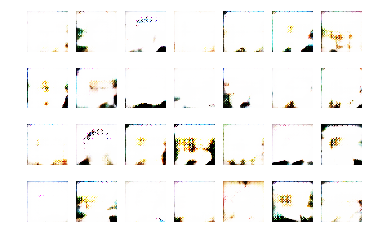

In [61]:
import matplotlib.pyplot as plt
import numpy as np
xsim = dis.xsim.eval()
for i in range(4*7):
    plt.subplot(4,7, i+1)
    plt.imshow(np.squeeze((xsim[i][:,:,:]+1)*0.5))
    plt.axis('off')